In [1]:
from sklearn.linear_model import (
    LinearRegression,
    RidgeCV,
    BayesianRidge,
    Ridge,
    ElasticNetCV,
    ElasticNet,
    Lasso,
    LassoCV,
    LarsCV,
    LassoLarsCV,
    SGDRegressor,
    TheilSenRegressor,
    RANSACRegressor,
)
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold, RepeatedKFold, StratifiedKFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from tqdm.notebook import tqdm
from pathlib import Path

INPUT_PATH = Path("/mnt/storage_dimm2/kaggle_data/commonlitreadabilityprize")
OUTPUT_PATH = Path("/mnt/storage_dimm2/kaggle_output/commonlitreadabilityprize")

np.random.seed(48)

In [2]:
model_folders = [
    # cherubic-nifty-serval - deberta-large - 0.4836
    "20210614-173633",
    "20210614-203831",
    "20210614-234025",
    "20210615-024138",
    "20210615-054256",
    # scrupulous-mink-of-amplitude - deberta-base - 0.4934
    "20210615-084357",
    "20210615-094729",
    "20210615-105329",
    "20210615-120001",
    "20210615-130640",
    # notorious-sticky-gibbon - roberta-base (with hidden) - 0.4961
    "20210615-220146",
    "20210615-225055",
    "20210615-234038",
    "20210616-003038",
    "20210616-012048",
    # fortunate-cherry-mandrill - roberta-large - 0.4890
    "20210616-021135",
    "20210616-041221",
    "20210616-060255",
    "20210616-075451",
    "20210616-094506",
    # mottled-certain-caracal - distilroberta-base - 0.5076
    "20210616-113626",
    "20210616-121203",
    "20210616-124738",
    "20210616-132341",
    "20210616-140300",
    # aspiring-classic-pegasus - funnel - 0.4975
    "20210617-083847", 
    "20210617-102611", 
    "20210617-120949", 
    "20210617-135233", 
#     "20210617-153459", Missing ckpts?
    # silver-bumblebee-of-attack - roberta-base - 0.4932
    "20210617-223340",
    "20210617-232650",
    "20210618-002022",
    "20210618-011405",
    "20210618-020751",
    # sloppy-resourceful-tanuki - albert-large - 0.5241
    "20210617-225903",
    "20210618-010302",
    "20210618-030706",
    "20210618-051049",
    "20210618-071437",
    # rustling-quirky-mastodon - bert-base-uncased - 0.5136
    "20210618-082756",
#     "20210618-092115",  # Only 4 ckpts
    "20210618-100526",
    "20210618-105909",
    "20210618-115253",
    # perky-defiant-husky - bert-large-uncased - 0.5287
    "20210618-124637",
    "20210618-144213",
    "20210618-163942",
    "20210618-183719",
    "20210618-203441",
    # gregarious-brass-perch - bart-base - 0.5445
    "20210618-223208",
    "20210618-233614",
    "20210619-004022",
    "20210619-014809",
    "20210619-025421",
    # military-firefly-of-apotheosis - bart-large - 0.5301
    "20210619-035747",
    "20210619-064351",
    "20210619-093050",
    "20210619-121916",
    "20210619-150740",
    # eccentric-lemur-of-tenacity - sentence-transformers/LaBSE - 0.5230
    "20210622-152356",
    "20210622-161822",
    "20210622-171312",
    "20210622-181238",
    "20210622-191326",
    # valiant-chameleon-of-chaos - sentence-transformers/bert-base-nli-cls-token - 0.5288
    "20210622-165808",
    "20210622-174555",
    "20210622-183427",
    "20210622-192221",
    "20210622-201127",
    # nonchalant-quaint-termite - roberta-base - 0.4951
    "20210623-093223",
    "20210623-101956",
    "20210623-110954",
    "20210623-120004",
    "20210623-125025",
    # skilled-smart-crane - deberta-large (new seeds) - 0.4758
    "20210623-105940",
    "20210623-140343",
    "20210623-170657",
    "20210623-201514",
    "20210623-232231",
    # winged-cerise-agouti - roberta-large - 0.4986
    "20210623-134115",
    "20210623-153240",
    "20210623-172217",
    "20210623-191151",
    "20210623-210342",
    # swift-of-amazing-pride - distilroberta-base - 0.5053
    "20210623-225426",
    "20210623-233019",
    "20210624-000706",
    "20210624-004429",
    "20210624-012102",
    # independent-discerning-earthworm - albert-large-v2
    "20210624-015812",
    "20210624-040309",
    "20210624-060838",
    "20210624-081317",
    "20210624-101855",
    # discreet-visionary-seahorse - microsoft/deberta-base - 0.5181
    "20210624-023057",
    "20210624-033624",
    "20210624-044356",
    "20210624-055212",
    "20210624-070123",
    # chirpy-wren-of-unity - funnel-transformer/large-base - 0.5000
    "20210624-081031",
    "20210624-095223",
    "20210624-113506",
    "20210624-131927",
    "20210624-150250",
    # free-ebony-fennec - microsoft/deberta-base - 0.5021
    "20210627-105133",
    "20210627-115742",
    "20210627-130650",
    "20210627-141604",
    "20210627-152616",
    # blond-viper-of-discussion - deepset/roberta-base-squad2 - 0.4900
    "20210627-105144",
    "20210627-114225",
    "20210627-123605",
    "20210627-133047",
    "20210627-142510",
    # meticulous-demonic-kakapo - roberta-large - 0.5030
    "20210627-151904",
    "20210627-171236",
    "20210627-190737",
    "20210627-210244",
    "20210627-225949",
    # fat-glorious-badger - deepset/roberta-large-squad2 - 0.4937
    "20210628-005835",
    "20210628-025632",
    "20210628-045559",
    "20210628-065437",
    "20210628-085322",
    # beautiful-denim-monkey - funnel-transformer/large-base - 0.5066
    "20210627-163614",
    "20210627-181626",
    "20210627-195827",
    "20210627-213946",
    "20210627-232205",
    # solid-zebu-of-happiness - albert-large-v2 - 0.5207
    "20210628-010737",
    "20210628-031447",
    "20210628-052149",
    "20210628-072849",
    "20210628-093543",
    # parrot-of-strange-maturity - sentence-transformers/LaBSE - 0.5286
    "20210628-114738",
    "20210628-125350",
    "20210628-135845",
    "20210628-150440",
    "20210628-161040",
    # greedy-dog-of-holiness - microsoft/deberta-large - 0.4756
    "20210628-114736",
    "20210628-145921",
    "20210628-181426",
    "20210628-212819",
    "20210629-004241",
    # truthful-hissing-waxbill - deepset/sentence_bert - 0.5504
    "20210628-171705",
    "20210628-180837",
    "20210628-190059",
    "20210628-195246",
    "20210628-204527",
    # blazing-natural-husky - bert-large-cased-whole-word-masking - 0.5202
    "20210628-213743",
    "20210628-233312",
    "20210629-012726",
    "20210629-032224",
    "20210629-051503",
    # ludicrous-heron-of-genius - bert-large-cased
    "20210629-035901",
    "20210629-055338",
    "20210629-074730",
    "20210629-094209",
    "20210629-113421",
    # cooperative-mink-of-spirit - xlm-roberta-base
    "20210629-081350",
    "20210629-091723",
    "20210629-102123",
    "20210629-112540",
    "20210629-122949",
    # dangerous-nebulous-horse - xlm-roberta-large - 0.5092
    "20210629-133352",
    "20210629-154453",
    "20210629-183058",
    "20210629-203803",
    "20210629-224305",
    # passionate-sexy-slug - bart-base - 0.5325
    "20210629-132611",
    "20210629-142628",
    "20210629-152921",
    "20210629-163239",
    "20210629-183052",
    # fascinating-lavender-turaco - electra-large - 
    "20210705-091644",
    # simple-sensible-bear - electra-large - 0.51669
    "20210705-143109",
    "20210705-162253",
    "20210705-181532",
    "20210705-200803",
    "20210705-215844",
    # aquatic-nostalgic-honeybee - electra-large - 0.51102 (KL loss)
    "20210706-185121",
    "20210706-204235",
    "20210706-223346",
    "20210707-002647",
    "20210707-022001",
    # melodic-snobbish-wrasse - sentence-transformers/paraphrase-mpnet-base-v2 - 0.5104
    "20210710-085905",
    "20210710-095408",
    "20210710-105043",
    "20210710-114855",
    "20210710-124531",
    # truthful-hummingbird-of-focus -google/bigbird-roberta-large - 0.5293
    "20210710-083949",
    "20210710-105221",
    "20210710-130717",
    "20210710-152140",
    "20210710-173710",
    # gabby-radical-jerboa - microsoft/deberta-large (stochastic target) - 0.4738
    "20210724-101022",
    "20210724-131834",
    "20210724-162806",
    "20210724-194719",
    "20210724-230817",
]

print(len(model_folders))

dataset_paths = [OUTPUT_PATH / f for f in model_folders]

200


In [3]:
mpaths, oof_paths = [], []
for p in dataset_paths:
    mpaths.append(sorted(list(p.glob(f"*/*/*.ckpt"))))
    oof_paths.extend(sorted(list(p.glob(f"*.csv"))))
    
len(model_folders), len(oof_paths)

(200, 200)

In [4]:
oofs = pd.read_csv(INPUT_PATH / "train.csv", usecols=["id", "target", "standard_error"]).sort_values(
        by="id"
    )
for i, (p, f) in enumerate(zip(oof_paths, model_folders)):
    x = pd.read_csv(p).sort_values(by="id")
    oofs[f] = x["prediction"].values

# pred_cols = [f"model_{i}" for i in range(len(mpaths))]
pred_cols = model_folders

print(len(pred_cols))
    
oofs.head()

200


,id,target,standard_error,20210614-173633,20210614-203831,20210614-234025,20210615-024138,20210615-054256,20210615-084357,20210615-094729,...,20210710-083949,20210710-105221,20210710-130717,20210710-152140,20210710-173710,20210724-101022,20210724-131834,20210724-162806,20210724-194719,20210724-230817
1279,000accf7e,-2.002055,0.497274,-2.174165,-2.305160,-2.451190,-2.505858,-2.490587,-2.264506,-2.664520,...,-2.433604,-2.352290,-2.457826,-2.559311,-2.667193,-2.388934,-2.229679,-2.372638,-2.176303,-2.477002
2185,001ef05a9,0.841000,0.492411,0.669889,0.569387,0.472606,0.514734,0.493645,0.528904,0.495011,...,-0.079809,0.017005,0.045347,0.498888,0.373763,0.576178,0.522853,0.640750,0.523485,0.590338
332,00589d631,-2.195109,0.520239,-1.908255,-1.930197,-2.064695,-2.545308,-2.129548,-2.160540,-2.234235,...,-2.024573,-1.884771,-2.114053,-2.019015,-2.306566,-2.328293,-2.277792,-2.121388,-2.033493,-2.249521
72,0060c36b9,-1.333456,0.492384,-1.098570,-1.134784,-1.161226,-1.260594,-1.139692,-0.983574,-1.220255,...,-1.135062,-1.009917,-1.150199,-1.122957,-1.156714,-1.041155,-1.234104,-1.124431,-1.174208,-1.117881
2694,00d4d251d,0.088764,0.463817,-0.226934,-0.034609,-0.219147,-0.192564,0.082993,-0.454333,-0.133543,...,0.251939,-0.457682,0.103368,0.165548,0.195490,-0.053507,-0.041325,-0.062111,-0.006494,0.130173


In [5]:
oofs.describe()

,target,standard_error,20210614-173633,20210614-203831,20210614-234025,20210615-024138,20210615-054256,20210615-084357,20210615-094729,20210615-105329,...,20210710-083949,20210710-105221,20210710-130717,20210710-152140,20210710-173710,20210724-101022,20210724-131834,20210724-162806,20210724-194719,20210724-230817
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,...,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,-0.948092,-0.939186,-0.936123,-0.968496,-0.958907,-0.891844,-0.910382,-0.932254,...,-0.920482,-0.921432,-0.928067,-0.909958,-0.911464,-0.923585,-0.907937,-0.915876,-0.906432,-0.916502
std,1.033579,0.034818,0.912312,0.889185,0.913707,0.930968,0.905059,0.907261,0.927470,0.911461,...,0.879174,0.867048,0.900036,0.872063,0.882588,0.933771,0.898550,0.905822,0.899691,0.921017
min,-3.676268,0.000000,-3.560785,-3.392829,-3.732013,-3.534283,-3.483280,-3.612729,-3.607502,-3.599687,...,-3.607702,-3.409277,-3.289720,-3.700936,-3.534374,-3.692640,-3.831271,-3.656340,-3.430722,-3.747105
25%,-1.690320,0.468543,-1.613250,-1.570393,-1.616401,-1.659845,-1.625832,-1.550567,-1.581456,-1.592230,...,-1.574786,-1.545850,-1.660455,-1.514295,-1.544298,-1.625832,-1.560691,-1.578736,-1.551498,-1.608029
50%,-0.912190,0.484721,-0.900925,-0.891787,-0.904669,-0.926716,-0.913854,-0.845645,-0.853657,-0.858941,...,-0.868739,-0.875356,-0.854468,-0.866046,-0.875494,-0.872104,-0.867661,-0.859381,-0.875349,-0.881303
75%,-0.202540,0.506268,-0.242909,-0.258008,-0.232878,-0.260776,-0.254002,-0.191775,-0.206128,-0.229850,...,-0.236294,-0.215183,-0.108021,-0.232907,-0.234612,-0.207632,-0.223054,-0.216145,-0.216711,-0.214542
max,1.711390,0.649671,1.249225,1.150385,1.232993,1.288711,1.167053,1.241939,1.432130,1.164523,...,1.273104,1.110044,0.982620,1.204302,1.293153,1.409263,1.229252,1.225440,1.264802,1.383879


# Add `textstat` features

In [6]:
import textstat

In [7]:
train = pd.read_csv(INPUT_PATH / "train.csv")

ts_features = [
    "flesch_reading_ease",
    "smog_index",
    "flesch_kincaid_grade",
    "coleman_liau_index",
    "automated_readability_index",
    "dale_chall_readability_score",
    "difficult_words",
    "linsear_write_formula",
    "gunning_fog",
#     "text_standard",
    "fernandez_huerta",
    "szigriszt_pazos",
    "gutierrez_polini",
    "crawford",
]

ts_df = []

for _, row in train.iterrows():
    data = {"id": row["id"]}
    for f in ts_features:
        data[f] = getattr(textstat, f)(str(row["excerpt"]))
    ts_df.append(data)
        
ts_df = pd.DataFrame(ts_df)
ts_df.head()

,id,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford
0,c12129c31,80.31,8.6,6.1,8.06,8.3,6.65,25,9.000000,8.31,112.2,112.25,46.59,1.5
1,85aa80a4c,82.54,8.3,5.2,6.78,7.2,5.92,17,7.285714,7.53,114.5,110.91,49.06,1.6
2,b69ac6792,75.74,10.1,7.9,7.20,10.1,6.29,17,14.750000,10.49,107.6,107.65,47.03,1.8
3,dd1000b26,72.02,6.7,11.4,8.54,16.4,6.61,14,12.500000,13.61,101.4,99.58,41.49,1.8
4,37c1b32fb,75.47,8.8,10.0,4.83,11.8,1.57,1,13.500000,11.76,104.9,105.39,48.95,1.6


# Hill climbing

In [8]:
# https://www.kaggle.com/abhishek/step-1-create-folds
def create_folds(data, y, n_splits=5, random_state=None):
    data = data.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # calculate number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, "bins"] = pd.cut(y, bins=num_bins, labels=False)

    # initiate the kfold class from model_selection module
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    splits = []

    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        splits.append((t_, v_))
        
    return splits

In [9]:
def get_score(X, y, ridge=True):
    if ridge:
        reg = RidgeCV(
            alphas=(
                0.0001,
                0.0005,
                0.001,
                0.005,
                0.01,
                0.05,
                0.1,
                0.5,
                1.0,
                5.0,
                10.0,
                50,
                100,
                500,
                1000,
            ),
            normalize=True,
        )
        reg.fit(X, y)
        return np.sqrt(-reg.best_score_)
    else:
        reg = LassoCV(
            max_iter=20000,
            random_state=48,
            n_jobs=-1,
            normalize=True,
            tol=1e-5,
            #         cv=RepeatedKFold(random_state=48),
            cv=create_folds(X, y, random_state=48),
            selection="random",
        ).fit(X, y)
        return np.sqrt(reg.mse_path_)[-1].mean()
    
    
    
def add_noise(X):
    std_error = oofs["standard_error"].values.reshape(-1, 1)
    delta = np.random.normal(scale=std_error, size=(len(std_error), X.shape[1]))
    return X + delta
    
    
def get_score_monte_carlo(X, y, ridge=True, n=100):
    scores = [get_score(add_noise(X), y, ridge=True) for _ in range(n)]
#     scores = Parallel(n_jobs=2, prefer="threads")(delayed(get_score)(add_noise(X), y, ridge) for _ in range(n))
        
    return np.mean(scores)


def averaging(X, y):
    y_pred = X.mean(1)
    return np.sqrt(mean_squared_error(y_pred, y))

In [10]:
def get_size(folder):
    # Ubuntu uses 1000**3, Kaggle use 1024**3
    return sum(f.stat().st_size for f in (OUTPUT_PATH / folder).rglob('*') if f.is_file()) / 1024**3


def get_model_name(folder):
    for f in (OUTPUT_PATH / folder).rglob('*.yaml'):
        with open(f, "r") as ymlfile:
            cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
            return cfg["model_name"]
                
def get_rmse(folder):
    return np.sqrt(mean_squared_error(oofs[folder], oofs["target"]))


def plot_heatmap(selection):
    corr = oofs[selection].corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.9, vmax=1.0, # center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [11]:
get_score(oofs[model_folders], oofs["target"])

0.4494884261738211

In [12]:
get_score_monte_carlo(oofs[model_folders], oofs["target"])

0.4574480002632002

In [13]:
# candidates = model_folders.copy()

# best_score = np.inf
# selection = []
# # tol = 0.00001
# tol = 0
# y = oofs["target"]
# storage = 0

# # Find best initial model
# initial_scores = [np.sqrt(mean_squared_error(oofs[c], oofs["target"])) for c in candidates]
# idx = np.argmin(initial_scores)
# best_score = initial_scores[idx]
# selection.append(candidates[idx])
# storage += get_size(candidates[idx])
# print(f"Initial {candidates[idx]}. Score {best_score:0.5f}. {storage:0.1f} GB")
# del candidates[idx]


# while storage < 120:
#     scores = [get_score(oofs[selection + [c]], y) for c in candidates]

#     idx = np.argmin(scores)
#     if scores[idx] < best_score - tol:
#         best_score = scores[idx]
#         selection.append(candidates[idx])
#         storage += get_size(candidates[idx])
#         print(f"Added {candidates[idx]}. New best score {best_score:0.5f}. {storage:0.1f} GB")
#         del candidates[idx]
#     else:
#         break
        
# print(len(selection), "models selected")
        
# selection

# Netflix method

https://kaggler.readthedocs.io/en/latest/_modules/kaggler/ensemble/linear.html#netflix

https://www.netflixprize.com/assets/GrandPrize2009_BPC_BigChaos.pdf

In [14]:
# https://kaggler.readthedocs.io/en/latest/_modules/kaggler/ensemble/linear.html#netflix
def netflix(es, ps, e0, l=.0001):
    """Combine predictions with the optimal weights to minimize RMSE.

    Ref: Töscher, A., Jahrer, M., & Bell, R. M. (2009). The bigchaos solution to the netflix grand prize.

    Args:
        es (list of float): RMSEs of predictions
        ps (list of np.array): predictions
        e0 (float): RMSE of all zero prediction
        l (float): lambda as in the ridge regression

    Returns:
        (tuple):

            - (np.array): ensemble predictions
            - (np.array): weights for input predictions
    """
    m = len(es)
    n = len(ps[0])

    X = np.stack(ps).T
    pTy = .5 * (n * e0**2 + (X**2).sum(axis=0) - n * np.array(es)**2)

    w = np.linalg.pinv(X.T.dot(X) + l * n * np.eye(m)).dot(pTy)

    return X.dot(w), w

In [15]:
# preds = [oofs[c].values for c in selection[:20]]
# rmses = [np.sqrt(mean_squared_error(p, oofs["target"])) for p in preds]

In [16]:
# kf = KFold(5, shuffle=True, random_state=48)

# for i in range(-8, 1):
#     scores = []
#     for fold, (trn_idx, val_idx) in enumerate(kf.split(oofs)):
#         train_oofs = oofs.loc[trn_idx]
#         valid_oofs = oofs.loc[val_idx]

#         train_preds = [train_oofs[c].values for c in selection[:20]]    
#         _, weights = netflix(rmses, train_preds, 1.4100, 10**i)

#         val_pred = valid_oofs[selection[:20]] @ weights
#         score = np.sqrt(mean_squared_error(val_pred, valid_oofs["target"]))
#         scores.append(score)
#         # print(f"Fold {fold}, RMSE: {score:0.5f}")

#     print(f"L: {10**i}, Final RMSE: {np.mean(scores):0.5f}")

# Netflix hillclimb

In [17]:
def get_nf_score(X, y=oofs["target"], cv=True):
    if cv:
        scores = []
        weights_agg = 0
        for seed in [48, 42, 3]:
            for fold, (trn_idx, val_idx) in enumerate(create_folds(X, y, random_state=seed)):
                train_oofs = X.loc[trn_idx]
                valid_oofs = X.loc[val_idx]
                train_target = y.loc[trn_idx]
                valid_target = y.loc[val_idx]

                train_preds = [train_oofs[c].values for c in X.columns]    
                rmses = [np.sqrt(mean_squared_error(X[c], y)) for c in X.columns]
#                 rmses = [np.sqrt(mean_squared_error(train_oofs[c], train_target)) for c in X.columns]
                _, weights = netflix(rmses, train_preds, 1.4100)

                val_pred = valid_oofs @ weights
                score = np.sqrt(mean_squared_error(val_pred, valid_target))
                scores.append(score)
                weights_agg += weights
                
        weights_agg /= len(scores)
        return np.mean(scores)
    else:
        preds = [X[c].values for c in X.columns] 
        rmses = [np.sqrt(mean_squared_error(X[c], y)) for c in X.columns]
        ensemble, weights = netflix(rmses, preds, 1.4100)
        return np.sqrt(mean_squared_error(ensemble, y))
    
    
def lstsq(X, y):
    if isinstance(X, pd.DataFrame):
        X = X.values
    W = (np.linalg.pinv(X.T @ X) @ X.T) @ y
    return W
    
    
def get_lstsq_score(X, y=oofs["target"]):
    W = lstsq(X, y)
    y_pred = X @ W
    return np.sqrt(mean_squared_error(y_pred, y))

In [18]:
get_nf_score(oofs[model_folders])

0.43264136392681524

In [19]:
candidates = model_folders.copy()

best_score = np.inf
selection = []
tol = 0
y = oofs["target"]
storage = 0

# Find best initial model
initial_scores = [np.sqrt(mean_squared_error(oofs[c], y)) for c in candidates]
idx = np.argmin(initial_scores)
best_score = initial_scores[idx]
selection.append(candidates[idx])
storage += get_size(candidates[idx])
print(f"Initial {candidates[idx]}. Score {best_score:0.5f}. {storage:0.1f} GB")

table = []
record = {
    "folder": candidates[idx],
    "model": get_model_name(candidates[idx]),
    "model_rmse": get_rmse(candidates[idx]),
    "best_score": best_score,
    "storage": storage,
}
table.append(record)
del candidates[idx]

while storage < 200:
#     scores = [get_score(oofs[selection + [c]], y) for c in candidates]
    scores = [get_nf_score(oofs[selection + [c]], y, False) for c in candidates]
#     scores = [get_nf_score(oofs[selection + [c]], y, True) for c in candidates]

    idx = np.argmin(scores)
    if scores[idx] < best_score - tol:
        best_score = scores[idx]
        selection.append(candidates[idx])
        storage += get_size(candidates[idx])
        print(f"Added {candidates[idx]}. New best score {best_score:0.5f}. {storage:0.1f} GB")
        record = {
            "folder": candidates[idx],
            "model": get_model_name(candidates[idx]),
            "model_rmse": get_rmse(candidates[idx]),
            "best_score": best_score,
            "storage": storage,
        }
        table.append(record)
        del candidates[idx]
        
    else:
        break
        
print(len(selection), "models selected")
table = pd.DataFrame(table)
selection  # 0.44098. 96.2 GB

Initial 20210724-230817. Score 0.47063. 7.6 GB
Added 20210616-041221. New best score 0.45971. 14.2 GB
Added 20210617-135233. New best score 0.45506. 20.9 GB
Added 20210624-012102. New best score 0.45266. 22.5 GB
Added 20210628-145921. New best score 0.45098. 30.1 GB
Added 20210619-035747. New best score 0.44937. 37.7 GB
Added 20210624-101855. New best score 0.44825. 38.1 GB
Added 20210623-232231. New best score 0.44725. 45.6 GB
Added 20210619-004022. New best score 0.44614. 48.3 GB
Added 20210628-045559. New best score 0.44521. 54.9 GB
Added 20210624-113506. New best score 0.44462. 61.6 GB
Added 20210710-173710. New best score 0.44394. 68.3 GB
Added 20210618-223208. New best score 0.44342. 71.0 GB
Added 20210627-105144. New best score 0.44301. 73.3 GB
Added 20210624-015812. New best score 0.44254. 73.7 GB
Added 20210624-044356. New best score 0.44213. 76.3 GB
Added 20210710-124531. New best score 0.44172. 78.3 GB
Added 20210705-162253. New best score 0.44135. 84.6 GB
Added 20210615-094

['20210724-230817',
 '20210616-041221',
 '20210617-135233',
 '20210624-012102',
 '20210628-145921',
 '20210619-035747',
 '20210624-101855',
 '20210623-232231',
 '20210619-004022',
 '20210628-045559',
 '20210624-113506',
 '20210710-173710',
 '20210618-223208',
 '20210627-105144',
 '20210624-015812',
 '20210624-044356',
 '20210710-124531',
 '20210705-162253',
 '20210615-094729',
 '20210627-152616',
 '20210614-203831',
 '20210622-152356',
 '20210627-213946',
 '20210624-150250',
 '20210628-085322',
 '20210619-064351',
 '20210618-183719',
 '20210628-031447',
 '20210623-201514',
 '20210619-093050',
 '20210627-151904',
 '20210624-033624',
 '20210629-183058',
 '20210616-003038',
 '20210616-132341',
 '20210629-012726',
 '20210629-163239',
 '20210629-035901',
 '20210629-224305']

In [20]:
table

,folder,model,model_rmse,best_score,storage
0,20210724-230817,microsoft/deberta-large,0.470629,0.470629,7.582309
1,20210616-041221,deepset/roberta-large-squad2,0.482696,0.459713,14.236939
2,20210617-135233,funnel-transformer/large-base,0.495666,0.455056,20.947421
3,20210624-012102,distilroberta-base,0.502802,0.452664,22.503372
4,20210628-145921,microsoft/deberta-large,0.471197,0.450978,30.085725
5,20210619-035747,facebook/bart-large,0.543126,0.449370,37.689213
6,20210624-101855,albert-large-v2,0.506411,0.448253,38.050881
7,20210623-232231,microsoft/deberta-large,0.471707,0.447245,45.633215
8,20210619-004022,facebook/bart-base,0.556662,0.446142,48.256762
9,20210628-045559,deepset/roberta-large-squad2,0.489583,0.445211,54.911412


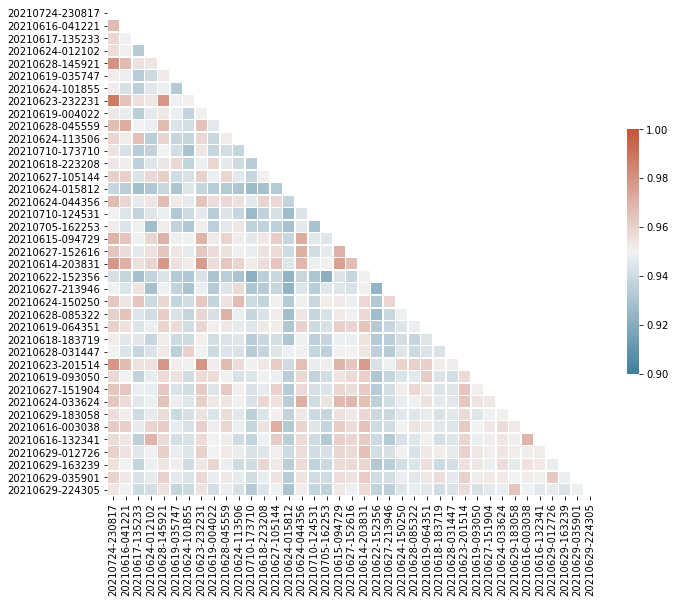

In [21]:
plot_heatmap(selection)

In [22]:
model_folders_current = [
    "20210628-145921",
    "20210624-150250",
    "20210616-041221",
    "20210623-232231",
    "20210624-012102",
    "20210619-004022",
    "20210617-135233",
    "20210619-035747",
    "20210624-101855",
    "20210628-045559",
    "20210618-223208",
    "20210624-015812",
    "20210627-105144",
    "20210627-152616",
    "20210624-113506",
    "20210615-094729",
    "20210624-044356",
    "20210614-203831",
    "20210622-152356",
    "20210628-085322",
    "20210627-213946",
    "20210617-120949",
    "20210619-064351",
    "20210623-201514",
    "20210618-183719",
    "20210628-031447",
    "20210629-183058",
    "20210627-151904",
    "20210616-003038",
    "20210616-132341",
    "20210629-012726",
    "20210629-163239",
    "20210629-035901",
    "20210628-212819",
    "20210627-105133",
    #     "20210627-195827",
    #     "20210619-093050",
    #     "20210629-224305",
]


model_folders_new = [
    "20210628-145921",
    "20210624-150250",
    "20210616-041221",
    "20210623-232231",
    "20210624-101855",
    "20210619-035747",
    "20210624-012102",
    "20210617-135233",
    "20210619-004022",
    "20210628-045559",
    "20210618-223208",
    "20210624-015812",
    "20210627-105144",
    "20210627-152616",
    "20210624-113506",
    "20210615-094729",
    "20210624-044356",
    "20210614-203831",
    "20210622-152356",
    "20210628-085322",
    "20210627-213946",
    "20210617-120949",
    "20210629-012726",
    "20210629-183058",
    "20210618-183719",
    "20210628-031447",
    "20210629-163239",
    "20210629-055338",
    "20210628-212819",
    "20210627-105133",
    "20210627-151904",
    "20210616-003038",
    "20210616-132341",
    "20210627-225949",
#     "20210629-224305",
#     "20210623-201514",
#     "20210628-114738",
#     "20210619-064351",
]

model_folders_current = set(model_folders_current)
model_folders_new = set(model_folders_new)

In [23]:
# Add these. Make colab command
add_list = model_folders_new.difference(model_folders_current)
for d in add_list:
    print(f"upload('{d}')")

upload('20210629-055338')
upload('20210627-225949')


In [24]:
add_list = model_folders_new.difference(model_folders_current)
for d in add_list:
    print(f"https://www.kaggle.com/anjum48/commonlitreadabilityprize-{d}")

https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210629-055338
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210627-225949


In [25]:
# Remove these. Make links
remove_list = model_folders_current.difference(model_folders_new)
for d in remove_list:
    print(f"https://www.kaggle.com/anjum48/commonlitreadabilityprize-{d}")

https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210629-035901
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210623-201514
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210619-064351


# Pruning

Start with everything, and iteratively remove the least informative models

Takes 2.5 hours for 175 models with CV. 11 mins without CV

In [26]:
# oofs = oofs.merge(ts_df, on="id")

In [27]:
candidates = model_folders.copy() # + ts_features
history = []
cv = False
ridge = True
# score = get_nf_score(oofs[candidates], oofs["target"], cv=cv)
score = get_score(oofs[candidates], oofs["target"], ridge=ridge)
# score = get_score_monte_carlo(oofs[candidates], oofs["target"], ridge=ridge)
# score = get_lstsq_score(oofs[candidates], oofs["target"])

print(f"Initial score {score:0.5f}")

while len(candidates) > 1:
    trial_candidates = [candidates[:i] + candidates[i+1:] for i, _ in enumerate(candidates)]
#    scores = [get_nf_score(oofs[tc], oofs["target"], cv=cv) for tc in trial_candidates]
    scores = [get_score(oofs[tc], oofs["target"], ridge=ridge) for tc in trial_candidates]
#     scores = [get_score_monte_carlo(oofs[tc], oofs["target"], ridge=ridge) for tc in trial_candidates]
#     scores = [get_lstsq_score(oofs[tc], oofs["target"]) for tc in trial_candidates]
    removed = candidates[np.argmin(scores)]
    del candidates[np.argmin(scores)]
#    score = get_nf_score(oofs[candidates], oofs["target"], cv=cv)
    score = get_score(oofs[candidates], oofs["target"], ridge=ridge)
#     score = get_score_monte_carlo(oofs[candidates], oofs["target"], ridge=ridge)
#     score = get_lstsq_score(oofs[candidates], oofs["target"])
    size = np.sum([get_size(c) for c in candidates])
    history.append({"models": candidates.copy(), "score": score, "size": size, "removed": removed})
    print(f"{len(history)} New score {score:0.5f}. Size: {size:0.1f} GB. Removed {removed}")
    
history = pd.DataFrame(history)
history.tail(40)

Initial score 0.44949
1 New score 0.44942. Size: 950.1 GB. Removed 20210710-130717
2 New score 0.44936. Size: 943.4 GB. Removed 20210710-105221
3 New score 0.44930. Size: 935.8 GB. Removed 20210619-150740
4 New score 0.44925. Size: 933.2 GB. Removed 20210618-233614
5 New score 0.44919. Size: 931.1 GB. Removed 20210710-114855
6 New score 0.44914. Size: 929.0 GB. Removed 20210710-085905
7 New score 0.44908. Size: 922.8 GB. Removed 20210618-144213
8 New score 0.44903. Size: 920.7 GB. Removed 20210628-171705
9 New score 0.44898. Size: 918.7 GB. Removed 20210628-180837
10 New score 0.44892. Size: 916.6 GB. Removed 20210628-195246
11 New score 0.44887. Size: 914.5 GB. Removed 20210628-190059
12 New score 0.44882. Size: 908.3 GB. Removed 20210618-163942
13 New score 0.44877. Size: 902.0 GB. Removed 20210618-124637
14 New score 0.44872. Size: 901.6 GB. Removed 20210617-225903
15 New score 0.44867. Size: 901.3 GB. Removed 20210624-040309
16 New score 0.44862. Size: 896.0 GB. Removed 20210629-08

133 New score 0.44324. Size: 325.6 GB. Removed 20210622-181238
134 New score 0.44320. Size: 316.7 GB. Removed 20210628-150440
135 New score 0.44318. Size: 307.9 GB. Removed 20210628-135845
136 New score 0.44313. Size: 299.0 GB. Removed 20210622-152356
137 New score 0.44304. Size: 292.8 GB. Removed 20210705-143109
138 New score 0.44296. Size: 290.1 GB. Removed 20210619-014809
139 New score 0.44290. Size: 283.4 GB. Removed 20210627-195827
140 New score 0.44282. Size: 277.2 GB. Removed 20210629-055338
141 New score 0.44276. Size: 270.5 GB. Removed 20210710-152140
142 New score 0.44270. Size: 268.4 GB. Removed 20210622-165808
143 New score 0.44263. Size: 266.0 GB. Removed 20210615-234038
144 New score 0.44257. Size: 264.0 GB. Removed 20210710-105043
145 New score 0.44252. Size: 256.4 GB. Removed 20210724-194719
146 New score 0.44248. Size: 254.0 GB. Removed 20210623-125025
147 New score 0.44244. Size: 247.3 GB. Removed 20210617-102611
148 New score 0.44240. Size: 239.8 GB. Removed 20210615

,models,score,size,removed
159,"[20210614-203831, 20210615-094729, 20210616-00...",0.442254,202.229068,20210623-233019
160,"[20210614-203831, 20210615-094729, 20210616-00...",0.442270,199.880790,20210623-110954
161,"[20210614-203831, 20210615-094729, 20210616-00...",0.442302,193.170309,20210617-120949
162,"[20210614-203831, 20210615-094729, 20210616-00...",0.442334,190.562070,20210624-033624
163,"[20210614-203831, 20210615-094729, 20210616-00...",0.442379,188.213770,20210627-142510
164,"[20210614-203831, 20210615-094729, 20210616-00...",0.442408,177.695708,20210629-224305
165,"[20210614-203831, 20210615-094729, 20210616-00...",0.442426,167.177645,20210629-183058
166,"[20210614-203831, 20210615-094729, 20210616-00...",0.442475,160.937846,20210629-035901
167,"[20210614-203831, 20210615-094729, 20210616-00...",0.442487,154.698046,20210629-012726
168,"[20210614-203831, 20210615-094729, 20210616-04...",0.442544,152.316730,20210616-003038


In [28]:
history.to_csv("pruning_v3.csv", index=False)

In [41]:
idx = 162
print(history.loc[idx, "score"], len(history.loc[idx, "models"]), history.loc[idx, "size"])
history.loc[idx, "models"]

0.44233423385248677 37 190.56206976156682


['20210614-203831',
 '20210615-094729',
 '20210616-003038',
 '20210616-041221',
 '20210616-132341',
 '20210617-135233',
 '20210618-183719',
 '20210618-223208',
 '20210619-004022',
 '20210619-035747',
 '20210619-064351',
 '20210623-201514',
 '20210623-232231',
 '20210624-012102',
 '20210624-015812',
 '20210624-101855',
 '20210624-113506',
 '20210624-150250',
 '20210627-105133',
 '20210627-152616',
 '20210627-105144',
 '20210627-142510',
 '20210628-045559',
 '20210628-085322',
 '20210627-213946',
 '20210628-031447',
 '20210628-114738',
 '20210628-145921',
 '20210629-012726',
 '20210629-035901',
 '20210629-183058',
 '20210629-224305',
 '20210629-163239',
 '20210705-162253',
 '20210710-124531',
 '20210710-173710',
 '20210724-230817']

In [30]:
len(history.loc[idx, "models"])

35

In [31]:
reg = RidgeCV(
    alphas=(
        0.0001,
        0.0005,
        0.001,
        0.005,
        0.01,
        0.05,
        0.1,
        0.5,
        1.0,
        5.0,
        10.0,
        50,
        100,
        500,
        1000,
    ),
    normalize=True,
)
reg.fit(oofs[history.loc[idx, "models"]], oofs["target"])
reg.alpha_

0.01

In [32]:
get_nf_score(oofs[history.loc[idx, "models"]], oofs["target"], cv=False)

0.4373921442851774

In [33]:
get_score(oofs[history.loc[idx, "models"]], oofs["target"])

0.44240821538637176

In [34]:
get_lstsq_score(oofs[history.loc[idx, "models"]], oofs["target"])

0.4373920213139835

In [35]:
model_folders_new = set(history.loc[idx, "models"])
add_list = model_folders_new.difference(model_folders_current)
for d in add_list:
    print(f"https://www.kaggle.com/anjum48/commonlitreadabilityprize-{d}")

https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210710-124531
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210724-230817
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210705-162253
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210710-173710
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210628-114738


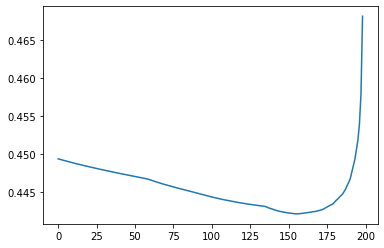

In [36]:
history["score"].plot();

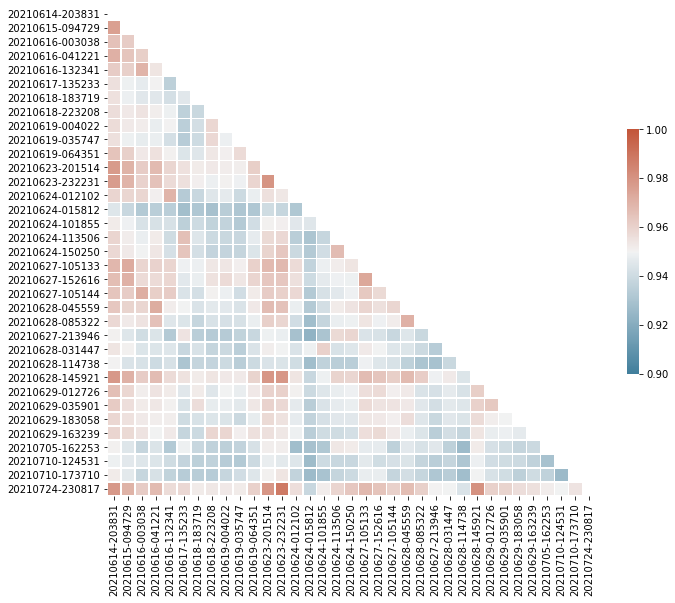

In [37]:
plot_heatmap(history.loc[idx, "models"])

In [38]:
# plt.scatter(oofs["dale_chall_readability_score"], oofs["target"])

In [39]:
# oofs["dale_chall_readability_score"].describe()